In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Ecuación de un sistema lineal de una sola variable

## $Y = \beta_0 + \beta_1 x + \epsilon$

In [29]:
ruido = np.random.normal(size=10000, scale=10)

In [47]:
x = np.linspace(0, 20, 100)
y = (5 * x) + 1

In [55]:
x.reshape(-1, 1)

array([[ 0.        ],
       [ 0.2020202 ],
       [ 0.4040404 ],
       [ 0.60606061],
       [ 0.80808081],
       [ 1.01010101],
       [ 1.21212121],
       [ 1.41414141],
       [ 1.61616162],
       [ 1.81818182],
       [ 2.02020202],
       [ 2.22222222],
       [ 2.42424242],
       [ 2.62626263],
       [ 2.82828283],
       [ 3.03030303],
       [ 3.23232323],
       [ 3.43434343],
       [ 3.63636364],
       [ 3.83838384],
       [ 4.04040404],
       [ 4.24242424],
       [ 4.44444444],
       [ 4.64646465],
       [ 4.84848485],
       [ 5.05050505],
       [ 5.25252525],
       [ 5.45454545],
       [ 5.65656566],
       [ 5.85858586],
       [ 6.06060606],
       [ 6.26262626],
       [ 6.46464646],
       [ 6.66666667],
       [ 6.86868687],
       [ 7.07070707],
       [ 7.27272727],
       [ 7.47474747],
       [ 7.67676768],
       [ 7.87878788],
       [ 8.08080808],
       [ 8.28282828],
       [ 8.48484848],
       [ 8.68686869],
       [ 8.88888889],
       [ 9

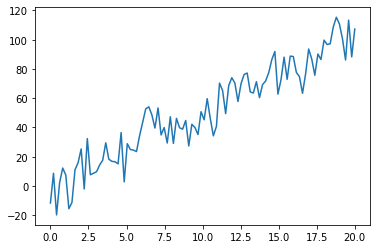

In [16]:
plt.plot(x, y)

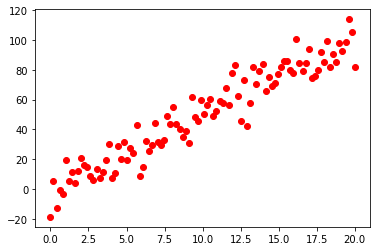

In [18]:
def lineal_model(sigma, N=100):
    ruido = np.random.normal(size=N)
    x = np.linspace(0, 20, N)
    y = (5 * x) + 1 + (ruido * sigma)
    plt.plot(x, y, 'ro')
    return x, y

x, y = lineal_model(10)

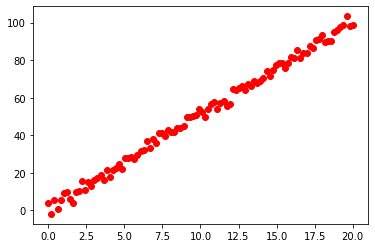

In [19]:
x, y = lineal_model(2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa8f81dc0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa8f81dc828>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa8f81cbf60>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa8f81dcf28>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8f81e32e8>,
 'means': []}

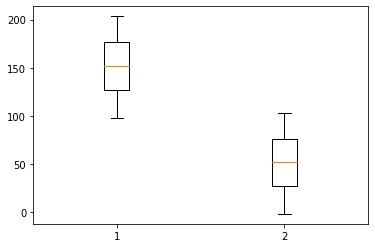

In [22]:
#x2, y2 = lineal_model(20, 100)
plt.boxplot([(y + 100), y])

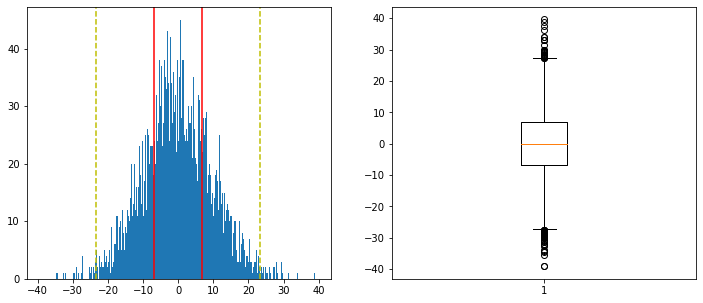

In [46]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
primer, segundo, inicio, fin = np.quantile(ruido, [0.25, 0.75, 0.01, 0.99])
plt.hist(ruido, bins=1000)
plt.axvline(primer, color='r')
plt.axvline(segundo, color='r')
plt.axvline(inicio, color='y', linestyle='--')
plt.axvline(fin, color='y', linestyle='--')
plt.subplot(1,2,2)
plt.boxplot(ruido)
plt.show()

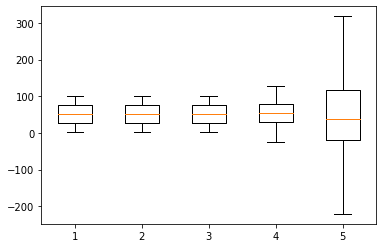

In [77]:
def conruido(y0, sigma=1):
    lenght = y0.shape[0]
    return y0 + np.random.normal(size=(lenght,), scale=sigma)
_ = plt.boxplot([y, y,conruido(y), conruido(y, 20), conruido(y, 100)])

# Son tres métodos principales:
- fit()
- predict()
- score()

In [111]:
y_r = conruido(y, 30) 

In [112]:
from sklearn import linear_model
model = linear_model.LinearRegression()
x = x.reshape(-1, 1)
model.fit(X=x, y=y_r)
print(model.intercept_,  model.coef_)

-6.140169028546623 [5.46564948]


# calculando $R^2$

In [113]:
r2 = model.score(x.reshape(-1, 1), y_r)

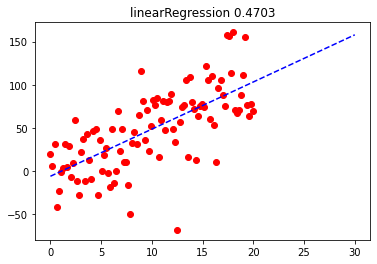

In [114]:
grafica(x, y_r, model, "linearRegression {:.4f}".format(r2))

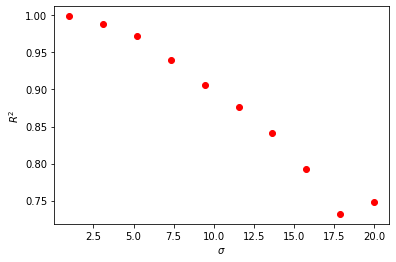

In [79]:
def ruidovsr2(x, y, sigma=2):
    y_r = conruido(y, sigma) 
    model.fit(X=x, y=y_r)
    return model.score(x, y_r)
r2_list = []
sigmas = np.linspace(1, 20, 10)
for sigma in sigmas:
    r2 = ruidovsr2(x.reshape(-1,1), y, sigma=sigma)
    r2_list.append(r2)
plt.plot(sigmas, r2_list, 'ro')
plt.ylabel("$R^2$")
plt.xlabel("$\sigma$")
plt.show()

# Ridge regression

In [115]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=50)
model.fit(x.reshape(-1,1), y_r)  # escala de ruido de 30
prediction = model.predict(x)
r2 = model.score(x.reshape(-1,1), y_r)

In [116]:
def grafica(x, y, model, title):
    x_new = np.linspace(0, 30, 5).reshape(-1,1)
    y_pred = model.predict(X=x_new)
    plt.plot(x, y, 'ro')
    plt.plot(x_new, y_pred, 'b--')
    plt.title(title)
    plt.show()

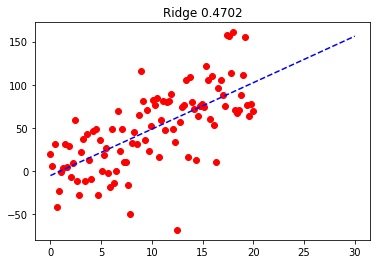

In [117]:
grafica(x, y_r, model, "Ridge {:.4f}".format(r2))

In [118]:
import pandas as pd

In [136]:
features = pd.read_csv("../Data/genomic_features.csv", header=0, index_col=None)

In [137]:
features

,COSMIC_ID,TISSUE_FACTOR,MSI_FACTOR,ABCB1_mut,ABL2_mut,ACACA_mut,ACVR1B_mut,ACVR2A_mut,AFF4_mut,AHCTF1_mut,...,"loss_cnaPANCAN415_(B2M,BUB1B,MGA,TP53BP1)",loss_cnaPANCAN416,loss_cnaPANCAN417,loss_cnaPANCAN418,loss_cnaPANCAN419,loss_cnaPANCAN420,loss_cnaPANCAN421,"loss_cnaPANCAN422, loss_cnaPANCAN423",loss_cnaPANCAN424,loss_cnaPANCAN425
0,1287381,lung_NSCLC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,924100,prostate,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,910924,stomach,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,687561,nervous_system,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1287706,skin,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,687452,Bladder,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,906798,Bladder,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,906797,Bladder,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,906800,leukemia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,905947,kidney,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
tabla_y = pd.read_csv("../Data/ic50.csv", header=None, index_col=None)

In [145]:
tabla_y.columns = ["COSMIC_ID", "y"]
tabla_y

,COSMIC_ID,y
0,1287381,4.927579
1,924100,1.710219
2,910924,2.906657
3,687561,4.320301
4,1287706,3.496982
5,687452,4.194036
6,906798,2.699101
7,906797,4.638347
8,906800,0.757602
9,905947,3.315073


In [146]:
dataset = pd.merge(features, tabla_y, on="COSMIC_ID")

In [153]:
Y = dataset["y"]

In [148]:
columnas = list(dataset.columns)

In [151]:
columnas.pop(-1)

'y'

In [ ]:
X = dataset[columnas]

In [160]:
X.columns.shape

(680,)

In [159]:
X.describe().columns.shape

(679,)

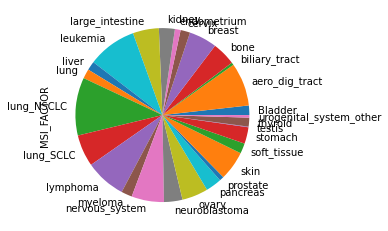

In [157]:
X.groupby('TISSUE_FACTOR').count().MSI_FACTOR.plot.pie()

In [162]:
unicas = X["TISSUE_FACTOR"].unique()

In [166]:
conversion = dict(zip(unicas, np.arange(0, unicas.shape[0])))

In [168]:
conversion

{'lung_NSCLC': 0,
 'prostate': 1,
 'stomach': 2,
 'nervous_system': 3,
 'skin': 4,
 'Bladder': 5,
 'leukemia': 6,
 'kidney': 7,
 'thyroid': 8,
 'aero_dig_tract': 9,
 'ovary': 10,
 'lymphoma': 11,
 'soft_tissue': 12,
 'myeloma': 13,
 'pancreas': 14,
 'breast': 15,
 'neuroblastoma': 16,
 'large_intestine': 17,
 'cervix': 18,
 'liver': 19,
 'bone': 20,
 'lung_SCLC': 21,
 'endometrium': 22,
 'lung': 23,
 'biliary_tract': 24,
 'urogenital_system_other': 25,
 'testis': 26}

In [169]:
X["TISSUE_FACTOR_CODED"] = X["TISSUE_FACTOR"].apply(lambda x: conversion[x])

In [171]:
columns2 = list(X.columns)
columns2.pop(1)

'TISSUE_FACTOR'

In [172]:
X_coded = X[columns2]

In [177]:
alpha = 3
model = Ridge(alpha=alpha)
model.fit(X_coded, Y)  # escala de ruido de 30
prediction = model.predict(X_coded)
r2 = model.score(X_coded, Y)
print(r2)

0.7238111832641486


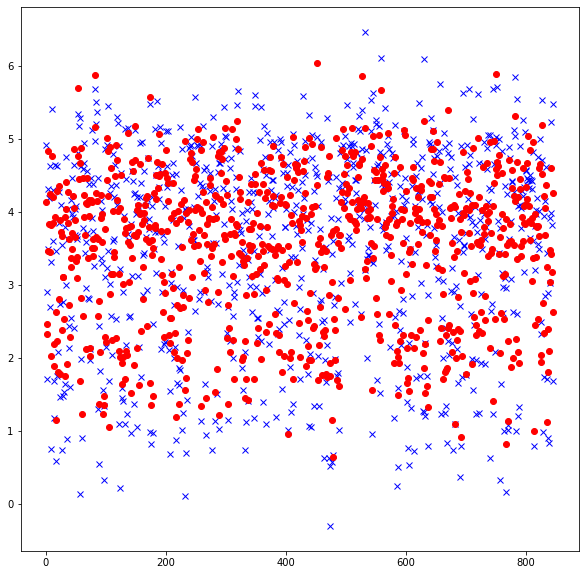

In [182]:
plt.figure(figsize=(10,10))
plt.plot(Y.values, 'bx')
plt.plot(prediction, 'ro')

In [204]:
def r2max(alpha, X, Y):
    model = Ridge(alpha=alpha)
    model.fit(X, Y)  # escala de ruido de 30
    r2 = model.score(X, Y)
    return r2

r2ses = []
alphas = np.logspace(0, 3, 50)
for alpha in alphas:
    r2ses.append(r2max(alpha, X_coded, Y))

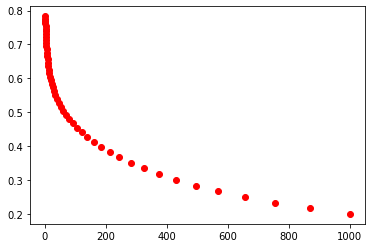

In [205]:
plt.plot(alphas, r2ses, 'ro')

<BarContainer object of 680 artists>

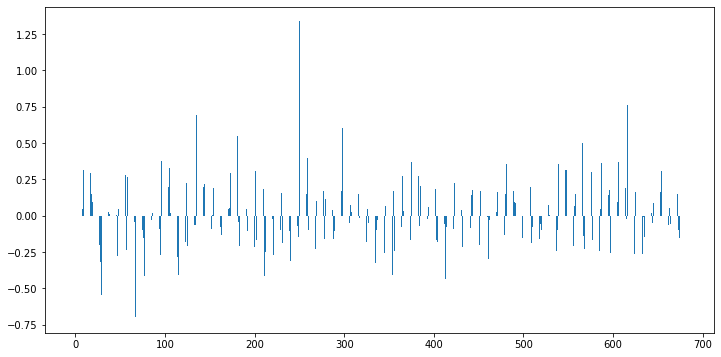

In [212]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(680), model.coef_, 0.3)